## Evaluating results

Let's look at one of the most effective models created - a Multinomial Naive Bayesian model, with minor Laplace smoothing, and n=500 top features used in a tfidf vectorizer.

In [31]:
# data analysis and wrangling
import pandas as pd
import pickle
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# other
from datetime import datetime

# machine learning
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, precision_score

In [25]:
def prep_data(in_file):
    data_df = pd.read_csv(in_file)
    title_vectorizer = TfidfVectorizer(max_features=500)
    title_vectorizer.fit(data_df.title)
    X_title = title_vectorizer.transform(data_df.title).toarray()

    url_vectorizer = TfidfVectorizer(max_features=500)
    url_vectorizer.fit(data_df.url)
    X_url = url_vectorizer.transform(data_df.url).toarray()

    X = np.concatenate([X_title, X_url], axis=1)
    Y = data_df['noneng'].values

    return X, Y

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("STD Dev: ", scores.std())

def draw_roc_curve(clf, X_test, Y_test):
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('ROC Curve - MNB (alpha=0.1)')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

with open('../models/nb_hand_oversampled.pkl', 'r') as f:
    clf = pickle.loads(f.read())

X, Y = prep_data('../data/data.csv')
X_train, Y_train = SMOTE().fit_resample(X[8000:], Y[8000:])
X_test, Y_test = X[:8000], Y[:8000]
Y_pred = clf.predict(X_test)

In [21]:
print classification_report(Y_test, Y_pred)
print confusion_matrix(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      6683
           1       0.46      0.91      0.61      1317

   micro avg       0.81      0.81      0.81      8000
   macro avg       0.72      0.85      0.74      8000
weighted avg       0.89      0.81      0.83      8000

[[5268 1415]
 [ 117 1200]]


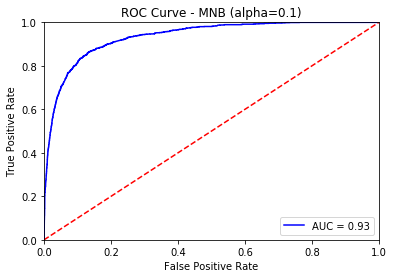

In [28]:
draw_roc_curve(clf, X_test, Y_test)